## Datenanalyse
- get an exampletory np_array
- get a feeling for its structure 
- try scipy methods
- simulate the example np_array with an np_array of your own making
- build a connection to the Fit-Gauss result

In [1]:
from matplotlib import pyplot as plt
import numpy as np

load example np_array and plot it

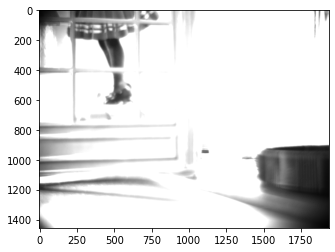

In [2]:
with open('test.npy', 'rb') as f:
    example_np_a = np.load(f)
plt.imshow(example_np_a, cmap='gray')
plt.show()

### example array structure

In [3]:
example_np_a.shape

(1456, 1936, 1)

In [10]:
#better shape for example_np_a would be (1456,1936)

#trying out reshaping:
test_a = np.arange(12).reshape(6,2,1)
print(test_a)
reshape_a = test_a.reshape(6,2)
reshape_a

[[[ 0]
  [ 1]]

 [[ 2]
  [ 3]]

 [[ 4]
  [ 5]]

 [[ 6]
  [ 7]]

 [[ 8]
  [ 9]]

 [[10]
  [11]]]


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [12]:
reshape_example_np_a = example_np_a.reshape(1456, 1936)
print (reshape_example_np_a.shape)
print (reshape_example_np_a)

(1456, 1936)
[[ 12  12  12 ... 170 177 172]
 [ 11  12  12 ... 180 186 173]
 [ 12  12  12 ... 187 189 174]
 ...
 [ 45  46  47 ...  11  12  11]
 [ 44  45  47 ...  11  11  12]
 [ 42  46  45 ...  11  11  10]]


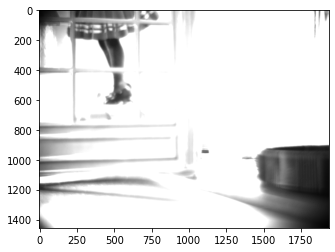

In [13]:
plt.imshow(reshape_example_np_a, cmap='gray')
plt.show()

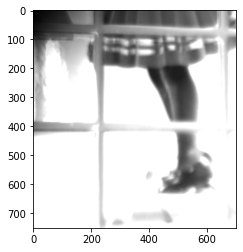

In [26]:
#obere linke Ecke ausgeben 
top_left_corner = reshape_example_np_a[0:750, 0:700]
plt.imshow(top_left_corner, cmap='gray')
plt.show()

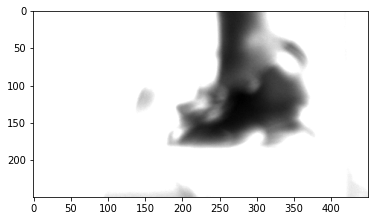

In [34]:
#einen Bereich in der Mitte ausgeben 
def np_area (twoD_np_a, x_tl, y_tl, x_br, y_br): #tl -top_left, br -bottom right -> Eckkoordinaten
    return twoD_np_a[y_tl:y_br, x_tl:x_br]
middle = np_area (top_left_corner, 250,450, 750,700)
plt.imshow(middle, cmap='gray')
plt.show()

wichtig: die Indexe im np_bild_array entsprechen nicht den Koordinaten von Pixel in einem Koordinatensystem! Die y-Achse ist falsch herum: oben ist die 0 und unten der max Wert

### scipy.npimage test